<a href="https://colab.research.google.com/github/majorquev/DBDC_202304_Programacion_en_R_para_ciencia_de_datos/blob/main/Clases/C7/Clase7_1_Distribuciones_de_probabilidad_en_r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parte 6: Distribuciones de probabilidad

**Autor:** Miguel Jorquera Viguera.<br>
**E-mail:** majorquev@gmail.com<br>
**Ayudante:** Rodrigo Morales<br>
**E-mail ayudante:** rumorale1@gmail.com

En R podemos obtener valores tanto de las funciones de densidad, distribución de probabilidad, cuantiles de una distribución o bien generar valores aleatorios de diversas distribuciones paramétricas.
Casi todas las distribuciones que se encuentran implementadas en la librería base de R se referencian de la misma manera.

* Funciones de densidad (PDFs) comienzan con la letra “d.”
* Funciones de distribución acumulada comienzan con la letra “p.”
* Funcioenes que retornan quantiles de una distribución comienzan con la letra “q.”
* Funciones que generan valores aleatorios comienzan con la letra“r.”

Por defecto, en R contamos con una amplia variedad familias de distribuciones enre las que destacan las siguientes.



**Distribution**| **R name**| **additional arguments**
-----| -----| -----
beta |`beta` |shape1, shape2, ncp
binomial| `binom`| size, prob
Cauchy|`cauchy` |location, scale
chi-squared| `chisq`| df, ncp
exponential| `exp` |rate
F| `f` |df1, df2, ncp
gamma |`gamma` |shape, scale
geometric |`geom` |prob
hypergeometric| `hyper`| m, n, k
log-normal| `lnorm` |meanlog, sdlog
logistic |`logis` |location, scale
negative| `binomial`| nbinom size, prob
normal |`norm` |mean, sd
Poisson| `pois`| lambda
signed rank |`signrank`| n
Student’s t| `t`| df, ncp
uniform |`unif`| min, max
Weibull| `weibull`| shape, scale
Wilcoxon |`wilcox`|m, n




# I) Distribución normal

## Función de densidad
$$f(x) = \frac{1}{\sqrt{2 π \sigma^2}} e^{-\frac{1}{2\sigma^2}(x - \mu)^2}$$

## En R...

* `dnorm(x, mean = 0, sd = 1, log = FALSE)`: Evalúa la función de densidad.
* `pnorm(q, mean = 0, sd = 1, lower.tail = TRUE, log.p = FALSE)`: Calcula la probabilidad acumulada (función de distribución).
* `qnorm(p, mean = 0, sd = 1, lower.tail = TRUE, log.p = FALSE)`: Calcula los quantiles de la distribución. (Función inversa de la función de distribución de probabilidad).
* `rnorm(n, mean = 0, sd = 1)`: Genera muestras aleatroias.




**P1.** Se sabe que la estatura de la población adulta de sexo masculino chilena sigue una distribución normal con media 171,8 cms y una desviación estándar de 5cms

**a)** ¿Cuál es la probabilidad de encontrar de que una persona hombre  adulta tenga una estatura
menor o igual a 160 cms?

In [ ]:
# X: Estatura (variable aleatoria)
# P(X <= 160)
# pnorm()
#?pnorm

pnorm(160, mean = 171.8, sd = 5)

# Hay 0.9% de prob de encontrar a un hombre adulto en Chile de menos de 1.60 mts.

[1] 0.009137468

In [ ]:
?pnorm


**b)** ¿Cuál es la probabilidad de encontrar de que una persona adulta tenga una estatura mayor  a 160 cms?


In [ ]:
#P(estatura > 160) = 1- P(estatura <= 160)

1-pnorm(160, mean = 171.8, sd = 5) # 99% de prob de que un adulto Chileno mida más de 1.60.

#NOTA
# lower.tail
pnorm(160, mean = 171.8, sd = 5, lower.tail = F)

[1] 0.9908625

[1] 0.9908625

**c)** ¿Cuál es la probabilidad de encontrar una persona con estatura entre 180cms y 190 cms?

In [ ]:
# P( 180 <= X <= 190)
pnorm(190, mean = 171.8, sd = 5) - pnorm(180, mean = 171.8, sd = 5)

# 5%

[1] 0.05036626

**d)** ¿Cuál es la estatura que corresponde al percentil 90?

In [ ]:
# Cual es la estatura que acumula el 90 % de probabilidad
qnorm(0.9,  mean = 171.8, sd = 5)
# La prob de encontrar una persona (adulta, hombre, en Chile) con estatura menor o igual a 178.2 es de un 90%

[1] 178.2078

In [ ]:
qnorm(0.5,  mean = 171.8, sd = 5)
# El la prob de que una persona mida igual o menos de la media es de un 50%.

[1] 171.8

**d)**  Genere una muestra aleatoria de tamaño 1000 y guárdela en un vector llamado _estaturas_, provenientes de una distribución normal con media 171,8 y desviación estandar igual a 5.

In [ ]:
# estaturas
set.seed(2020) #semilla
estaturas <- rnorm(1000, mean = 171.8, sd = 5)


In [ ]:
head(estaturas)

[1] 173.6849 173.3077 166.3099 166.1480 157.8173 175.4029

In [ ]:
mean(estaturas)
sd(estaturas)

[1] 171.6666

[1] 5.184827

**e)** Mediante la función _hist()_ y la función _curve()_  genere un histograma de la muestra creada y añada la curva de distribución normal con la media y desviación estandar reales.

In [ ]:
## NOTA
dnorm(1, mean = 0, sd = 1)

[1] 0.2419707

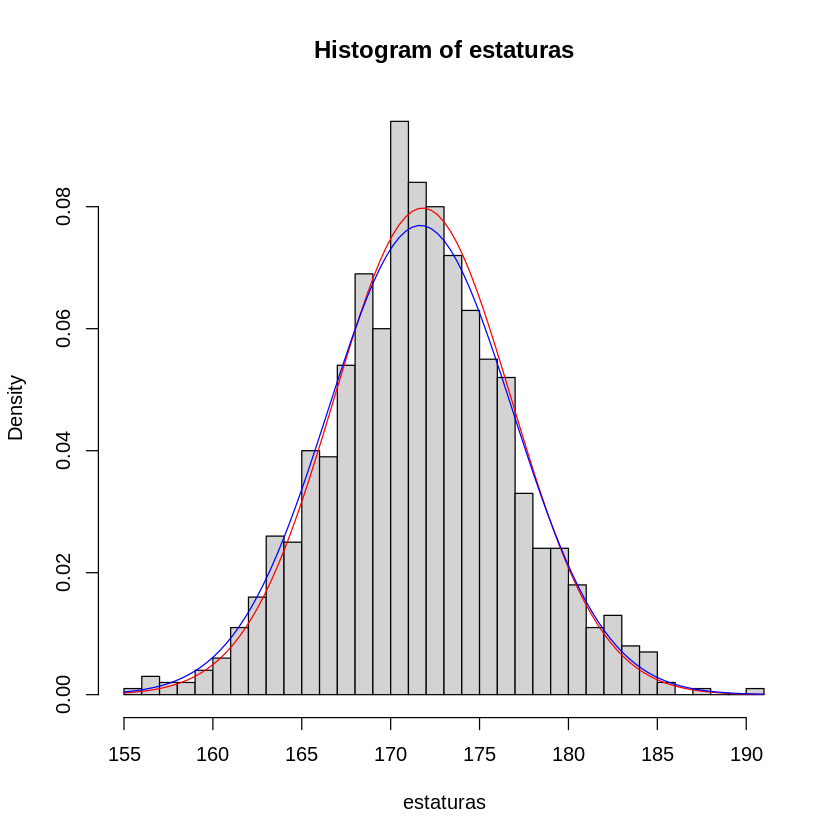

In [ ]:
hist(estaturas,freq = F,30)
curve(dnorm(x,mean = 171.8, sd = 5 ),add = T, col = "red") # dendisdad de la normal con parámetros reales
curve(dnorm(x,mean = mean(estaturas), sd = sd(estaturas) ),add = T, col = "blue") # dendisdad de la normal con parámetros estimados


In [ ]:
est <- data.frame(estaturas = estaturas)
head(est)

estaturas
1 173.6849 
2 173.3077 
3 166.3099 
4 166.1480 
5 157.8173 
6 175.4029

In [ ]:
library(ggplot2)
library(dplyr)

In [ ]:
?stat_function

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


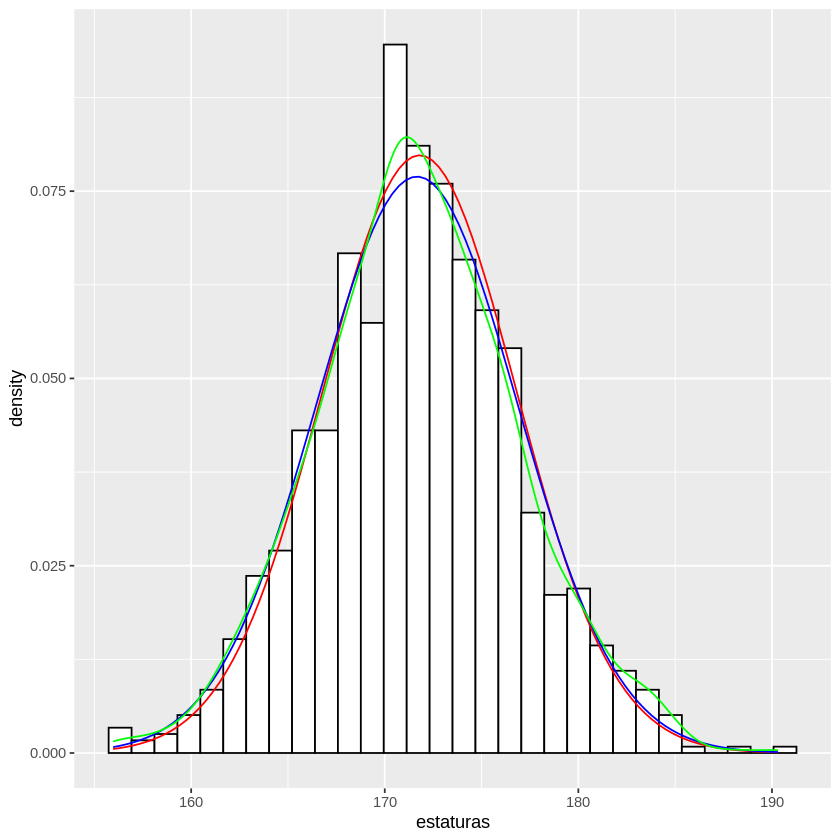

In [ ]:
# Podremos hacer lo mismo con ggplot
est %>%
  ggplot() +
  aes(x = estaturas) +
  geom_histogram(
    fill = "white",
    color = "black",
    aes(y = after_stat(density))
  ) +
  stat_function( #geom_function también sirve
    fun = dnorm,
    args = list(mean = 171.8, sd = 5),
    col = "red"
  ) +
  stat_function( #geom_function también sirve
    fun = dnorm,
    args = list(mean = mean(est$estaturas), sd = sd(est$estaturas)),
    col = "blue"
  ) +
  geom_density(col = "green")


In [ ]:
## para revisar
#stat_function(
#    fun = "dnorm", args = list(mean = 171.8, sd = 5),
#    col = "red"
#  )

## Recordatorio (definición de funciones)

```
function(par1, par2, ...){
    ...
    return(...)
}
```

In [ ]:
suma <- function(a,b){
  aux <- a+b
  return(aux)
}

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


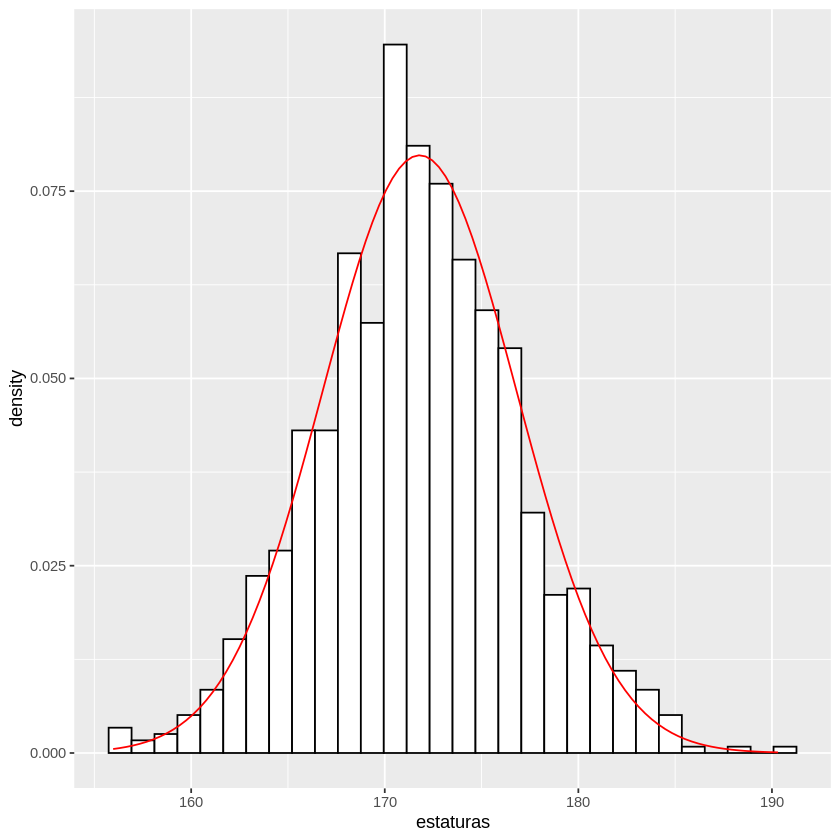

In [ ]:
est %>%
  ggplot() +
  aes(x = estaturas) +
  geom_histogram(
    fill = "white",
    color = "black",
    aes(y = after_stat(density))
  ) +
  stat_function( #geom_function también sirve
    fun = function(x){
      dnorm(x,mean = 171.8, sd = 5)
    },
    col = "red"
  )

# II)Distribucion binomial
## Contexto
Cuando una variable aleatoria representa la cantidad de éxitos en $n$ ensayos independientes de tipo Bernoulli (0 o 1), se dice que dicha variable sigue una distribución binomial.

## Función de probabilidad


$$p(x) = {n\choose x}p^x(1-p)^{n-x}$$
Donde $n$ es el total de ensayos realizados y $x$ es la cantidad de éxitos observados y $p$ es la probabilidad de éxito del evento de interés.

## En R...

* `dbinom(x, size, prob, log = FALSE)`: Evalúa la función de masa. En el caso discreto corresponde a la probabilidad del evento.
* `pbinom(q, size, prob, lower.tail = TRUE, log.p = FALSE)`: Calcula la probabilidad acumulada.
* `qbinom(p, size, prob, lower.tail = TRUE, log.p = FALSE)`: Retorna cuantiles de la distribución.
* `rbinom(n, size, prob)`: Genera muestras aleatorias.

**P2.** Suponga que un spot publicitario de un artículo tiene una tasa de efectividad de 20% sobre una determinada población.

**a)** Suponga que se logra llegar con el spot a 100 personas. ¿Cuál es la probabilidad de que
 al menos 30  personas compren el artículo ofrecido?

In [ ]:
# Identifiquemos algunos elementos como
# Experimento : Hacer llegar el spot a las 100 personas y registrar el número de clientes que efectivamente compraron el artículo.
# Variable aleatoria : X: "el número de clientes (de los 100) que compraron el artículo"
# Espacio muestral : {0,1,2,...,100}
# Prob de éxito (que la persona compre el artículo) es: 0.2
#-------parámetros de pbinom ---------
#size (n): 100
#prob (p): 0.2

#P(X>=30) = 1 - P(X <= 29) = 1-P(X<30)
# NOTA: Recordar que pbinom(x,...) = P(X <= x)
1-pbinom(29, size = 100, p = 0.2)
1-pbinom(29, 100, 0.2)
# Hay una probabilida del 1.1% de que 30 o más personas compren el artículo.

[1] 0.01124898

[1] 0.01124898

In [ ]:
# ¿Cuál es la probabilidad de que exactamente 30 personas compren el artículo ofrecido?

dbinom(30, 100, 0.2) # 0.5% de prob de que 30 personas compren...
#O alternativamente.
pbinom(30, 100, 0.2) - pbinom(29, 100, 0.2)#  0.5% de prob de que 30 personas compren...

[1] 0.005189643

[1] 0.005189643

**P3.** En una localidad se sabe que el 70% de las casas tienen un televisor.  Se quiere realizar una encuesta a 8 casas ¿cuál es la probabilidad de que 6 o más de ellas tengan televisor?

In [ ]:
# size = 8
# prob = 0.7

# P(X >= 6) = 1-P(X<=5)

1-pbinom(5, 8, 0.7) # Hay un 55% de prob de que 6 o más casas tengan tv
pbinom(5, 8, 0.7, lower.tail = F)

[1] 0.5517738

[1] 0.5517738

## Lanzando una moneda
**P4** Supongamos que una **honesta** se lanza 14 veces y se anota el número veces que se obtuvo cara.

**a)** ¿Cuál es la probabilidad de obtener exactamente 4 caras? ¿y al menos 10?

In [ ]:
#size = n = 14, y prob = p = 0.5 ?
dbinom(4, 14,0.5)# 6% de prob de obtener 4 caras
pbinom(9, 14,0.5,lower.tail = F)# 9% de prob de obtener al menos 10.


[1] 0.06109619

[1] 0.08978271


**b)** Si se repite el experimento 1000 veces.


*   ¿Qué proporción de caras se debería esperar? aprox.
*   ¿En qué % de casos se obtuvo exactamente 4 caras?



In [ ]:
# simulamos un experimento binomial
set.seed(2019)
N <- 10000
caras <- rbinom(N, 14,0.5)



In [ ]:
caras

[1]  8  8  6  8  4  4  9  3  5  8  8  8  6  5  8  8  4  8  6  7  7  7 10  5
   [25]  5  3  7 10  8  7  8  3  9  5  4  4  6  7  3  8  8  6  9  8  9  7 10 10
   [49]  5  5  6  4  4  6  7  6 12 10  4  4  5  6  8  6  8 11  6  4  9  7  6  5
   [73]  6  5  7 12  5  7  6  8  4 10 10  6  7  5  7  7  8  6  7  8  9  5  7  9
   [97]  7 10  6 10  7  9  7  9  6  8  6  7  5  4  6 11  6  7  9 10  7  6  9  4
  [121]  5 11  6  4  8  9 10  9  6  5  5  5  6  7  6  6  8  7  7  6  8  6  8  8
  [145]  6  8 10  6 11  6  7  2  5  6  7  6  8  9  7  8  5  7  7  7  9  7  7  7
  [169]  6  7  6  7  7  9  7  7  6  7  9  5  8  8  6  7  5  6  6  6  7  7  7  9
  [193]  7  7  6  8  6  8  6  5  5  8  9 10  6  9  7  8  4  5 10  8  8  5  8  8
  [217]  8  7  2  5  5  8  7  3  6  8  6  8  9  6  5  7  7  8  6  9  3  7  5  4
  [241]  8 10  9  9  2  8  4  7  7  7  8  4  6 10  6  6  6  6  5  6  9  6  9  8
  [265] 11  7  9  6  7  6  4  7  7  5  8  5 10  6  7  5  7  6  8  7  9  7  7  4
  [289]  4  9  9  9 10 10  8  5  6  8  5  6  6  7  7  4  6  4  4  7 11  8  5  8
  [313]  5  6  7  4  7  5  8  6  4  6  5  9  7  6  8  7  3  7  6  8  4  7  7  4
  [337]  9  7  7  6  7  7  5 11  7 10  5  5  6  6  9  7  6  4  9 10  8  8  7  6
  [361]  7  9  8  5  6  7  5  6  6  9  8 10  5  5  7  6  7  8  2  6  7  7  9  9
  [385]  6  5  6  7  8  7  7  6  6  7  6  4  9  8  4  4  8 10  6  6  9  8  4  7
  [409]  9  9  6  6  4 10  8  8  6  9  8  4  9  6  7  4  5  7  3  8  7  9  8  7
  [433]  7  9  6  3  9  3  5  5  6  6  8  5  4  9  9  7  6  7  6  6  4  6  9  8
  [457] 10 10  8  8  6  9  8  6  6  6  7  3  4  8 11  6  6  6  7  9 10  6  3  6
  [481]  6  4  7 10  6  5  7  5  7  5  6  8  9  9  7  8  8  7  4 10  7  6  9  8
  [505]  9 10  8  7  7  7  5  8  9  8  6  5 10  5  6 11  7  7  4  7  5  7  7  4
  [529]  6 10  5  7  6  8  9  8  6 10  7  9 10  8  7 10  6  9  9  6  6  4  7  8
  [553]  5  6  6  8  4  8  5  7 11  7  5  9  7 10  5 10  5  7 11 10  4  7  8  8
  [577]  5  7  6  6  6  5  5  7  6  9  6  5  8  4  7  8  5  6  7  3  8  5  9  5
  [601]  7  6  7  8  8  5  8  7  7  7  8  7  2 10  4  5  9  9 10  9  6  4  8  5
  [625]  7  7  8  5  6  8  6  6  7  8  9  5  4  7  3  9  4  8  8  5  8  9  9  5
  [649]  6 10  8  6  6  4  3  8  6  6  5  5  4  7  5 10  4  6  8  7  9  6  9  3
  [673]  5  9 10 10  6  7  7 10  3 11  9  9  5  7  9  7  6  5  7  8  3  5  6 10
  [697]  8  7  9  8  9  6  9  6 10  9  6  7  5 11  7  6  6  3  6  7  5  6  6  6
  [721]  6  8  7  6  6  6  6  7  8  7  7  3  6  4  7 10 11  8  7  6  9  7  6  8
  [745]  6  9  8  8  7  5  9  6  6  8  6  7  5  7  8  8 10  7 10  5  7  5  8  6
  [769] 11  5  7  8  6  7  6  9  7  7  6  8  8  9  7  9  8  6  8  9  7  6  7  4
  [793]  9  8  9  8  7  8  4  5  5  8  7  6 11  6  7  6  3  8  7  5  4  4  5  9
  [817]  7  4  5  7  4  3  9  4  9  6  5  4  6  7  7 11  7  9 11  8  3  8  5  5
  [841] 10  8  7  9  4  8  9  4  9  8  8  9  9  6  6  8 10  8  7  9  5  7  6  7
  [865]  8  9  7 10  5  8  7  8  5  8  8  6  3  3  7  8  5  6  8  7  6  7  9  4
  [889]  9  5  6 11  3  6  5  4  6 10  3  8  2  8  6  5  8  6  7  6  4  7  9  7
  [913]  8  7  9  7  8  8  5  9  5  4  4  9  9  7  8  7  6  8  9  6  8  6  5  9
  [937]  9  8  8  6  8  8  7  6  6 10  7  7 12  4  9  6  8  6  7  7 10  7  6  9
  [961]  4  6  6  7  7 12  9  5  7  7  8  5  8  7 13  7  5  8  6  8 10  6  4  7
  [985]  6  5  5  6  7  4 10  7  5  4  4  8  6  8  8  6  6  5  8  5  7  7  4  8
 [1009]  7  7  9  7  7  8  8  7  4 10  6  6  8  9  7  7 10 10  5  8  9  4  6  9
 [1033]  5  8  5  8  6  6  9  7  7  6  5  3 11  8  9  3 12  4  5  7  7  7  4  9
 [1057]  8  8  4  4  9  8  6 10  6  4  6 10  6  6  8  8  8  8  6  7 10  6  3  8
 [1081]  8  8  6  5  9  6  5  2 10  8  7  5  7  2  7  5  9  4  5 10  7  4  5  7
 [1105]  8  7  8  6 12  6  8  6  6  7  4  7  8  9  7  6  4  9  4  7  6  8  9 10
 [1129]  6  7  4  7  7  7 10  8  8  7  6  6  9 10  8  6 10  9  8  7  7  9 10  8
 [1153]  7  7  8  4  7 10  6  4  6  8  7  9  8  9  7  9  5  6  9  6  4  6  7  9
 [1177]  5  6  8 10  9  5  7  7  9  7  5  7 10  6  4  7  7  8  6  7  4  6  6  7
 [12

In [ ]:
mean(caras)/14

[1] 0.4968143

In [ ]:
mean(caras == 4)

[1] 0.0647

In [ ]:
# Pero si queremos visualizar las frecuencias relativas observadas?
# Adicionalmente nos interesaría poder visualizar la función de masa de probabilidad.
df <- data.frame(caras = caras)


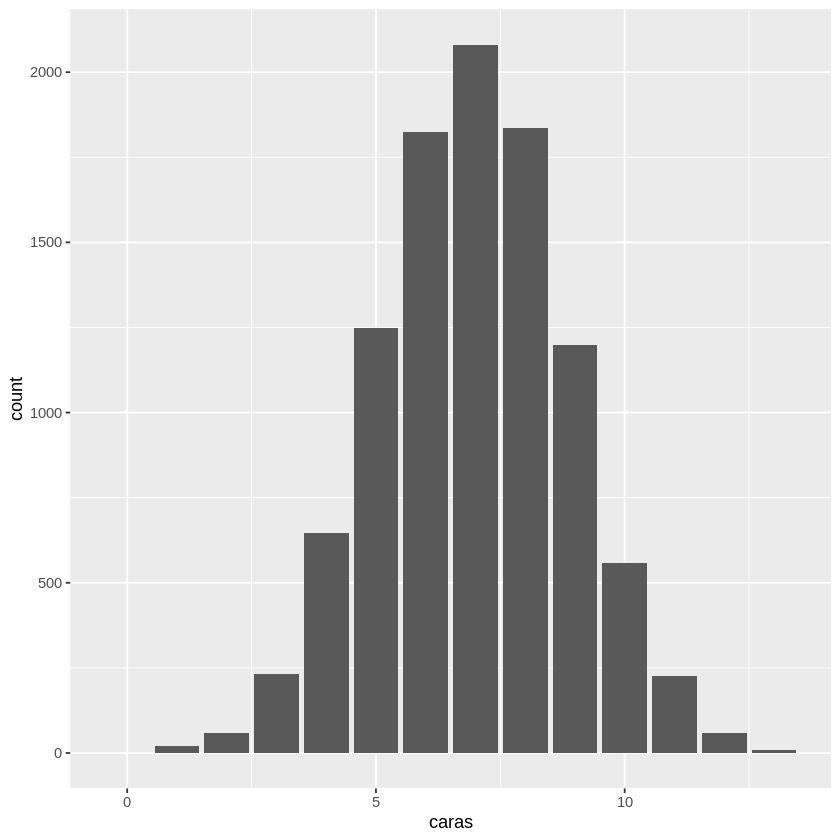

In [ ]:
df %>%
  ggplot() +
  aes(x = caras) +
  geom_bar()

In [ ]:
aux <- df %>%
  count(caras) %>%
  mutate(f_rel_obs = n/N) %>%
  bind_rows(data.frame(caras = 14, n = 0, f_rel_obs = 0)) %>%
  mutate(prob_real = dbinom(caras, 14, 0.5))

aux

caras n    f_rel_obs prob_real   
1   0       1 0.0001    6.103516e-05
2   1      20 0.0020    8.544922e-04
3   2      59 0.0059    5.554199e-03
4   3     231 0.0231    2.221680e-02
5   4     647 0.0647    6.109619e-02
6   5    1249 0.1249    1.221924e-01
7   6    1824 0.1824    1.832886e-01
8   7    2081 0.2081    2.094727e-01
9   8    1837 0.1837    1.832886e-01
10  9    1199 0.1199    1.221924e-01
11 10     557 0.0557    6.109619e-02
12 11     227 0.0227    2.221680e-02
13 12      59 0.0059    5.554199e-03
14 13       9 0.0009    8.544922e-04
15 14       0 0.0000    6.103516e-05

In [ ]:
?geom_function

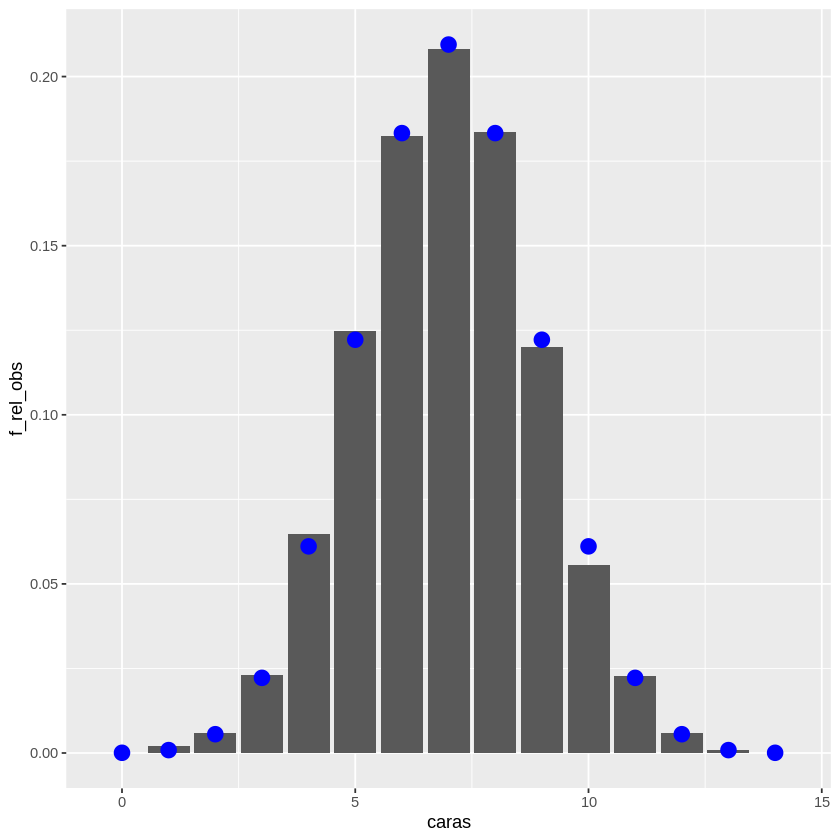

In [ ]:
aux %>%
  ggplot() +
  aes(x = caras,  y = f_rel_obs ) +
  geom_bar(stat = "identity") +
  geom_point(aes(y = prob_real), col = "blue", size = 4)

# III) Distribución poisson
## Contexto
Usualmente una variable aleatoria poisson, representa la cantidad de eventos registrados en un interval fijo de tiempo con una cierta tasa de ocurrencia.
## Función de probabilidad

$$p(x) = \lambda^x \dfrac{e^{-\lambda}}{x!}$$

Donde $\lambda$ corresponde a la tasa de ocurrencia y $x$ la cantida de eventos observados.

## Funciones en R
 * `dpois(x, lambda, log = FALSE)`
 * `ppois(q, lambda, lower.tail = TRUE, log.p = FALSE)`
 * `qpois(p, lambda, lower.tail = TRUE, log.p = FALSE)`
 * `rpois(n, lambda)`

**P5.** Suponga que en un restaurant de comida se tiene una tasa de llegada de clientes de 2 clientes por cada 3 minutos en promedio.
¿Cuál es la probabilidad de que 5 o más clientes lleguen en un período de 9 minutos?.


In [1]:
# La tasa de éxito en una dist. poisson es el parámetro lambda
# Dada la info, se tiene una tasa de 6 clientes cada 9 minutos
# 1-P(X <= 4) = P(X >=5 ) = 1-P(X < 5)
1-ppois(4, lambda = 6) #71% de prob de que lleguen 5 o más clientes.





[1] 0.7149435

**P6.** Se sabe que la tasa de falla en la elaboración de ampolletas sigue una distribución poisson, con una tasa de falla de 3 ampolletas defectuosas por semana.
¿Cuál es la probabilidad de que al cabo de un mes se genere un total de 20 ampolletas defectuosas o más?



In [3]:
# lambda = 3*4 = 12 ampolletas defectuosas por mes

1-ppois(19, lambda = 12)# 2% de prob de tener 20 o más ampolletas defectuosas


[1] 0.02127977